# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

In [ ]:
data_train = pd.read_csv('train.csv') #загружаем датасет
data_train.head(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'Cl-Mon',
    'Cl-Tot', 
    'Mon-Tot'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
print(data_train.isna().mean()) # не видим nan-ов в выборке ни в одном столбце
print()
print(data_train.info())  # зато видим проблемы в стоблцах с числовыми признаками

ClientPeriod                0.0
MonthlySpending             0.0
TotalSpent                  0.0
Sex                         0.0
IsSeniorCitizen             0.0
HasPartner                  0.0
HasChild                    0.0
HasPhoneService             0.0
HasMultiplePhoneNumbers     0.0
HasInternetService          0.0
HasOnlineSecurityService    0.0
HasOnlineBackup             0.0
HasDeviceProtection         0.0
HasTechSupportAccess        0.0
HasOnlineTV                 0.0
HasMovieSubscription        0.0
HasContractPhone            0.0
IsBillingPaperless          0.0
PaymentMethod               0.0
Churn                       0.0
dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent  

In [ ]:
print(data_train[data_train['TotalSpent'] == ' ']) # видим, что в столбце есть пробельные символы
data_train.loc[data_train['TotalSpent'] == ' ', 'TotalSpent'] = 0 # замеянем их на нули
data_train['TotalSpent'] = data_train['TotalSpent'].astype('float') # кастуем в float
None

      ClientPeriod  MonthlySpending  ...              PaymentMethod Churn
1048             0            25.75  ...               Mailed check     0
1707             0            73.35  ...               Mailed check     0
2543             0            19.70  ...               Mailed check     0
3078             0            80.85  ...               Mailed check     0
3697             0            20.00  ...               Mailed check     0
4002             0            61.90  ...  Bank transfer (automatic)     0
4326             0            25.35  ...               Mailed check     0
4551             0            52.55  ...  Bank transfer (automatic)     0
4598             0            56.05  ...    Credit card (automatic)     0

[9 rows x 20 columns]


In [ ]:
data_train['Cl-Mon'] = data_train['ClientPeriod'] * data_train['MonthlySpending']
data_train['Cl-Tot'] = data_train['ClientPeriod'] * data_train['TotalSpent']
data_train['Mon-Tot'] = data_train['MonthlySpending'] * data_train['TotalSpent']

In [ ]:
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,Cl-Mon,Cl-Tot,Mon-Tot
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0,1072.5,56449.25,20013.8250
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0,1861.2,134798.40,48396.3700
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1,75.9,75.90,5760.8100
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0,2537.6,82240.00,203801.0000
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0,6915.0,405507.00,778911.3625


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f917a414410>,
      dtype=object)

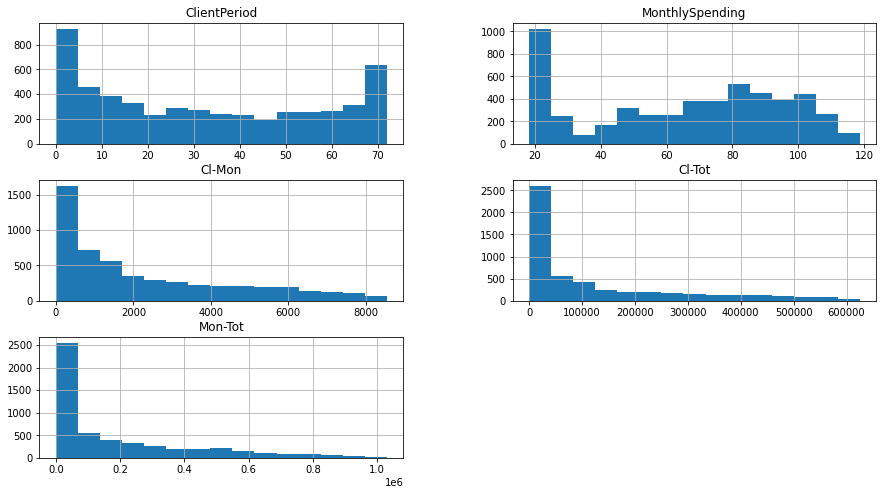

In [ ]:
data_train.hist(column=num_cols, figsize=(15, 8), bins = 15) # гистограммы для численных признаков

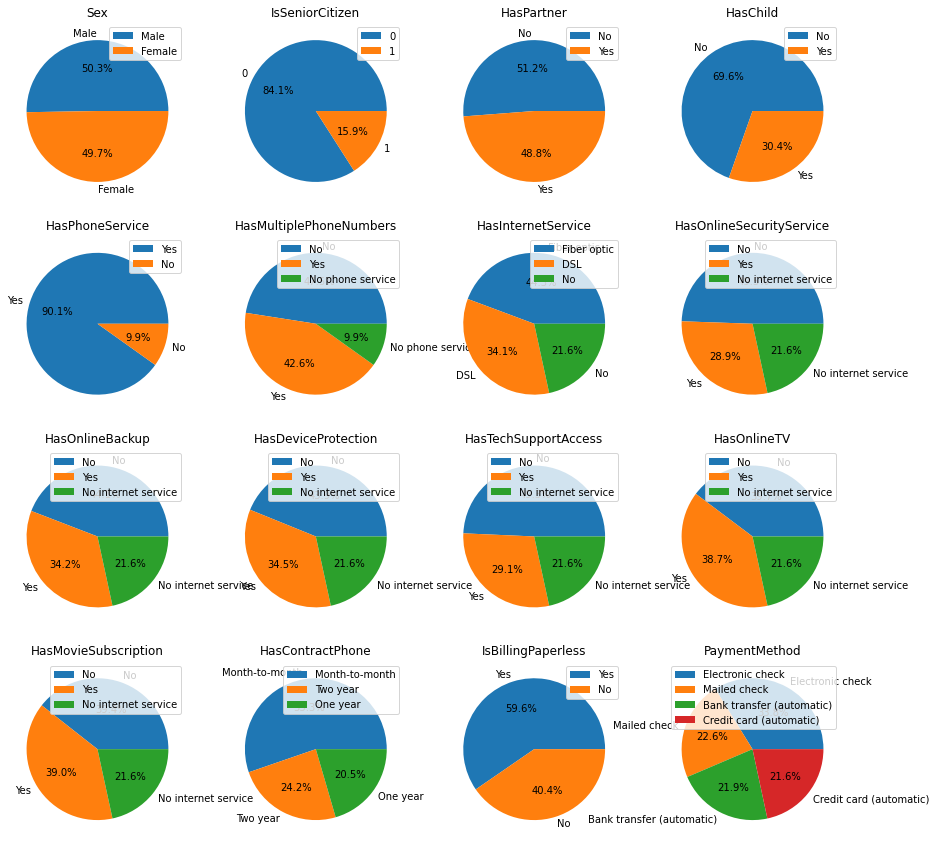

In [ ]:
fig = plt.figure(figsize =(15, 15))   # круговые диаграммы для категориальных признаков
for i in range(len(cat_cols)):
  distr = data_train[cat_cols[i]].value_counts()
  plt.subplot(4, 4, i + 1)
  plt.pie(distr, labels = distr.index, autopct='%1.1f%%')
  plt.title(cat_cols[i])
  plt.legend()

In [ ]:
data_train[target_col].value_counts() # распределение целевой переменной

0    3898
1    1384
Name: Churn, dtype: int64

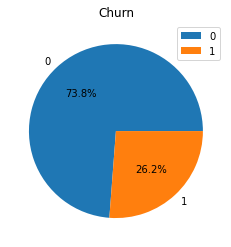

In [ ]:
plt.pie(data_train[target_col].value_counts(), labels = data_train[target_col].value_counts().index, autopct='%1.1f%%')
plt.title(target_col)
plt.legend()
#классы не являются несбалансированными, примерное распределение 1 к 3

In [ ]:
data_train.corr().style.background_gradient(cmap='coolwarm').set_precision(2) #посмотрим на корреляцию между числовыми признаками

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn,Cl-Mon,Cl-Tot,Mon-Tot
ClientPeriod,1.00,0.25,0.83,0.01,-0.35,0.83,0.83,0.71
MonthlySpending,0.25,1.00,0.65,0.22,0.18,0.65,0.54,0.72
TotalSpent,0.83,0.65,1.00,0.09,-0.20,1.00,0.97,0.97
IsSeniorCitizen,0.01,0.22,0.09,1.00,0.16,0.10,0.06,0.11
Churn,-0.35,0.18,-0.20,0.16,1.00,-0.20,-0.22,-0.14
Cl-Mon,0.83,0.65,1.00,0.10,-0.20,1.00,0.97,0.97
Cl-Tot,0.83,0.54,0.97,0.06,-0.22,0.97,1.00,0.94
Mon-Tot,0.71,0.72,0.97,0.11,-0.14,0.97,0.94,1.00


In [ ]:
data_train.drop('TotalSpent', axis=1, inplace=True)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
q_low = data_train["TotalSpent"].quantile(0.01)
q_hi  = data_train["TotalSpent"].quantile(0.99)
print(data_train[(data_train["TotalSpent"] > q_hi) | (data_train["TotalSpent"] < q_low)])
data_filtered = data_train[(data_train["TotalSpent"] < q_hi) & (data_train["TotalSpent"] > q_low)]
#создадим "отфильтрованную" дату без возможных выбросов колонки Total_Spent

KeyError: ignored

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

In [ ]:
X_train = data_train[num_cols + cat_cols] # из обычной даты
y_train = data_train[target_col]

#selector = VarianceThreshold(threshold = 0)
#X_train2 = selector.fit_transform(data_train[num_cols])
#print(X_train2.shape, data_train[num_cols].shape, sep = '\n')

X_train1 = data_filtered[num_cols + cat_cols] # из отфильтрованной даты
y_train1 = data_filtered[target_col]

In [ ]:
num_pipe = make_pipeline(  # scaler для числовых
    StandardScaler(),
)

In [ ]:
cat_pipe = make_pipeline( #onehot для категориальнх
    OrdinalEncoder(),
    OneHotEncoder(),
)

In [ ]:
prepare_pipeline = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ])

clf = make_pipeline(prepare_pipeline,
                    LogisticRegression(solver = 'liblinear', random_state=42))

In [ ]:
param_grid = {   #перебор параметров
    'logisticregression__penalty':['l1', 'l2'],
    'logisticregression__C': [100, 50, 40, 20, 10, 1, 0.1],
    'logisticregression__max_iter': [100, 200, 300],
}

In [ ]:
grid_srch = GridSearchCV(clf, param_grid, cv = 5, scoring='roc_auc', verbose=4, n_jobs = 4, refit = True)

In [ ]:
grid_srch.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'Cl-Mon',
                                                                          'Cl-Tot',
                                                                          'Mon-Tot']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ordinalencod

In [ ]:
roc_auc_score(y_train1, grid_srch.predict_proba(X_train1)[:, 1])

0.8496396637308774

In [ ]:
roc_auc_score(y_train, grid_srch.predict_proba(X_train)[:, 1])

0.8497487039448124

In [ ]:
print(grid_srch.best_params_)

{'logisticregression__C': 40, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l1'}


In [ ]:
print(grid_srch.best_estimator_.predict_proba(X_train1)[:, 0])

[0.99104741 0.99691249 0.35614798 ... 0.71772093 0.62862424 0.84474724]


### Лучшее качество на train - 0.8489206892818906 при параметрах best_params_ ('logisticregression__C': 100, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2')
### Результат в kaggle - 0.84612

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [ ]:
import catboost 
from catboost import CatBoostClassifier

In [ ]:
X_trainprob = X_train
X_trainprob['Prob'] = grid_srch.best_estimator_.predict_proba(X_train)[:, 0]
y_trainprob = y_train 
# добавляем в датасет дополнительную колонку вероятностей из LogisticRegression

In [ ]:
X_train1prob = X_train1
X_train1prob['Prob'] = grid_srch.best_estimator_.predict_proba(X_train1)[:, 0]
y_train1prob = y_train1
# то же самое для отфильтрованной даты

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
param_grid = {
        "n_estimators": np.arange(150, 550, 100),
        "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06],
        "min_data_in_leaf":[30, 40, 45, 50, 55, 60],
        "depth": np.arange(2, 6),
         } 
cat_mod = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False, eval_metric='AUC')
result = cat_mod.grid_search(param_grid, X_train, y_train)

#после большого количества проб, проверяем примерно эти параметры для неотфильтрованного сета


bestTest = 0.869571344
bestIteration = 149

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8695713	best: 0.8695713 (0)	total: 627ms	remaining: 6m

bestTest = 0.8706078757
bestIteration = 83

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8706079	best: 0.8706079 (1)	total: 1.26s	remaining: 6m

bestTest = 0.8698770492
bestIteration = 143

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8698770	best: 0.8706079 (1)	total: 1.87s	remaining: 5m 56s

bestTest = 0.869342065
bestIteration = 132

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8693421	best: 0.8706079 (1)	total: 2.5s	remaining: 5m 57s

bestTest = 

In [ ]:
roc_auc_score(y_trainprob, cat_mod.predict_proba(X_trainprob)[:, 1])   

0.8710150751682351

In [ ]:
roc_auc_score(y_train1prob, cat_mod.predict_proba(X_train1prob)[:, 1]) 

0.8705309245100549

In [ ]:
roc_auc_score(y_train, cat_mod.predict_proba(X_train)[:, 1])

0.8710150751682351

In [ ]:
roc_auc_score(y_train1, cat_mod.predict_proba(X_train1)[:, 1])

0.8705309245100549

In [ ]:
result['params']  #лучшие параметры catboost                

{'depth': 5, 'iterations': 250, 'learning_rate': 0.05, 'min_data_in_leaf': 30}

In [ ]:
data_test = pd.read_csv('test_churn.csv')

In [ ]:
data_test.loc[data_test['TotalSpent'] == ' ', 'TotalSpent'] = 0 # замеянем их на нули
data_test['TotalSpent'] = data_test['TotalSpent'].astype('float') # кастуем в float
data_test['Cl-Mon'] = data_test['ClientPeriod'] * data_test['MonthlySpending']
data_test['Cl-Tot'] = data_test['ClientPeriod'] * data_test['TotalSpent']
data_test['Mon-Tot'] = data_test['MonthlySpending'] * data_test['TotalSpent']
data_test.drop('TotalSpent', axis=1, inplace=True)

In [ ]:


data_test.loc[data_test['TotalSpent'] == ' ', 'TotalSpent'] = 0 # замеянем их на нули
data_testdrop(['TotalSpent'] = data_test['TotalSpent'].astype('float') # кастуем в float

# читаем тестовый сет для ответа

In [ ]:
data_test['Prob'] = grid_srch.best_estimator_.predict_proba(data_test)[:, 0] #добавляем колонку предсказаний LogisticRegression

In [ ]:
#best_model = CatBoostClassifier(verbose = False, cat_features = cat_cols, iterations = 650, learning_rate = 0.03, depth = 3)
# лучшая модель без дополнительной колонки вероятностей на отфильтрованном сете

In [ ]:
best_model = CatBoostClassifier(verbose = False, cat_features = cat_cols, iterations = 250, learning_rate = 0.05, depth = 5, min_data_in_leaf = 50)

In [ ]:
#best_model1 = CatBoostClassifier(verbose = False, cat_features = cat_cols, iterations = 210, learning_rate = 0.04, depth = 5, min_data_in_leaf = 88)
# # лучшая модель с дополнительной колонкой вероятностей

In [ ]:
best_model.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_train1prob, best_model.predict_proba(X_train1prob)[:, 1])

0.8695756188592115

In [ ]:
X_test = data_test[num_cols + cat_cols] # из обычной даты

In [ ]:
ids = np.arange(data_test.shape[0])
answer = pd.DataFrame({
    "Id": ids,
    "Churn": best_model.predict_proba(X_test)[:, 1]
})
answer.to_csv('sub.csv', index = False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

### Лучшее качество на train - 0.8612973490184681 при параметрах ('min_data_in_leaf': 88,  'depth': 5,  'iterations': 210,  'learning_rate': 0.04000000000000001)
### Результат в kaggle - 0.85319

#### Лучший результат kaggle для модели без допколонки с параметрами ('iterations' = 650, 'learning_rate' = 0.03, 'depth' = 3) - 0.85354